# 🛒 **Shopping Trends Dataset Metadata**

### **Analysis Created by Omar & Razan**
### **📜 About the Dataset**

The **Shopping Trends Dataset** provides a comprehensive view of consumer behavior in the retail sector. Designed to uncover patterns and insights, the data spans various transactional, demographic, and behavioral aspects. This dataset is a valuable resource for understanding customer shopping preferences and for implementing data-driven retail strategies.  

---
### **🔑 Key Features**

1. **Customer Information**
   - **Customer ID**: Unique identifier for customers.  
   - **Age**: Customer's age in years.  
   - **Gender**: Male/Female.  
   - **Location**: Geographic location of the customer.  

2. **Transaction Details**
   - **Item Purchased**: Name of the purchased item.  
   - **Category**: Product category.  
   - **Purchase Amount (USD)**: Transaction value in dollars.  
   - **Season**: Time of year (e.g., Winter, Summer).  
   - **Payment Method**: Method used for payment (e.g., Credit Card, PayPal).  
   - **Preferred Payment Method**: Customer's preferred payment method.  

3. **Behavioral Insights**
   - **Frequency of Purchases**: How often the customer makes purchases.  
   - **Previous Purchases**: Total previous transactions.  
   - **Review Rating**: Customer's rating (1.0–5.0).  

4. **Promotional Insights**
   - **Discount Applied**: Indicates if a discount was used.  
   - **Promo Code Used**: Tracks promo code usage.  

5. **Shipping Information**
   - **Shipping Type**: Delivery method chosen.  

## **📚Import Library**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

**Read DataSet**

In [2]:
df = pd.read_csv("/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv")
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


## 📊 Exploring the Dataset

In [3]:
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


In [4]:
df.sample(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3836,3837,62,Female,Skirt,Clothing,84,Alaska,M,Violet,Spring,2.5,No,Venmo,Free Shipping,No,No,38,PayPal,Fortnightly
197,198,59,Male,Scarf,Accessories,78,South Carolina,M,Black,Fall,3.2,Yes,Debit Card,2-Day Shipping,Yes,Yes,41,Credit Card,Monthly
3741,3742,58,Female,Shirt,Clothing,96,Arizona,M,Purple,Spring,3.2,No,Venmo,2-Day Shipping,No,No,26,Debit Card,Bi-Weekly
956,957,29,Male,Shirt,Clothing,99,Mississippi,XL,Cyan,Spring,2.9,Yes,Venmo,2-Day Shipping,Yes,Yes,42,Debit Card,Quarterly
2750,2751,51,Female,Sandals,Footwear,66,Alaska,L,Pink,Spring,2.7,No,Cash,2-Day Shipping,No,No,26,PayPal,Every 3 Months
1255,1256,30,Male,Hat,Accessories,68,Indiana,M,Peach,Fall,4.1,No,Credit Card,Standard,Yes,Yes,38,Cash,Fortnightly
658,659,62,Male,Backpack,Accessories,37,Louisiana,S,White,Fall,4.9,Yes,Debit Card,Store Pickup,Yes,Yes,20,Venmo,Weekly
115,116,53,Male,Skirt,Clothing,94,Wyoming,M,Gray,Spring,3.8,Yes,Cash,Standard,Yes,Yes,48,Debit Card,Every 3 Months
1312,1313,66,Male,T-shirt,Clothing,79,Missouri,M,Violet,Winter,3.0,No,Venmo,Store Pickup,Yes,Yes,19,Bank Transfer,Monthly
2492,2493,50,Male,Sunglasses,Accessories,96,South Dakota,S,Silver,Summer,4.1,No,Venmo,Next Day Air,No,No,34,Bank Transfer,Bi-Weekly


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [6]:
df.shape

(3900, 19)

## **Data Handling**

In [7]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


**🧠 we can't describe (Customer Id)** 

## 🔍 Exploratory Data Analysis 

## 🧑‍🤝‍🧑 Customer Information EDA

**1-📊 Age Distribution** 

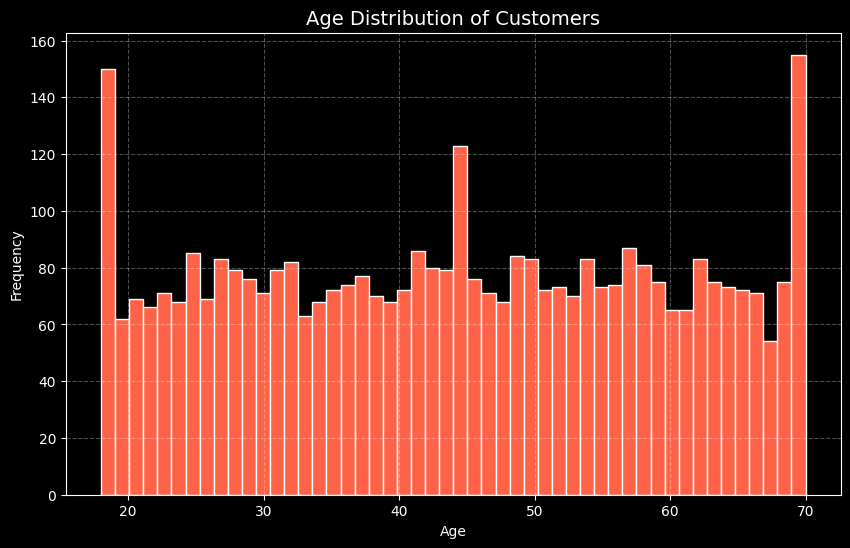

In [10]:
plt.style.use('dark_background') 
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=50, color='#ff6347', edgecolor='white')
plt.title('Age Distribution of Customers', fontsize=14, color='white')
plt.xlabel('Age', color='white')
plt.ylabel('Frequency', color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**2- 👥 Gender** 

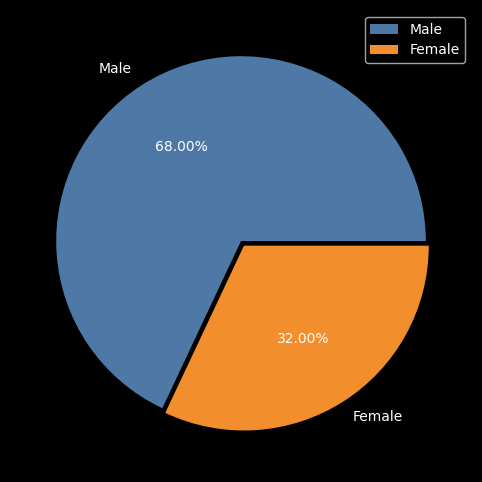

In [11]:
consistent_colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', '#EDC948', '#B07AA1', '#FF9DA7']
plt.figure(figsize=(10,6))
explode = (0,0.03)
plt.pie(df['Gender'].value_counts().values,
        labels=df['Gender'].value_counts().index,
        colors=consistent_colors[:len(df['Gender'].value_counts())],
        explode=explode,
        autopct="%1.2f%%",
        )
plt.title('')
plt.legend()
plt.show()

**♾️The percentage of men is greater than that of girls**

**3- 📍 Location-Based Analysis**

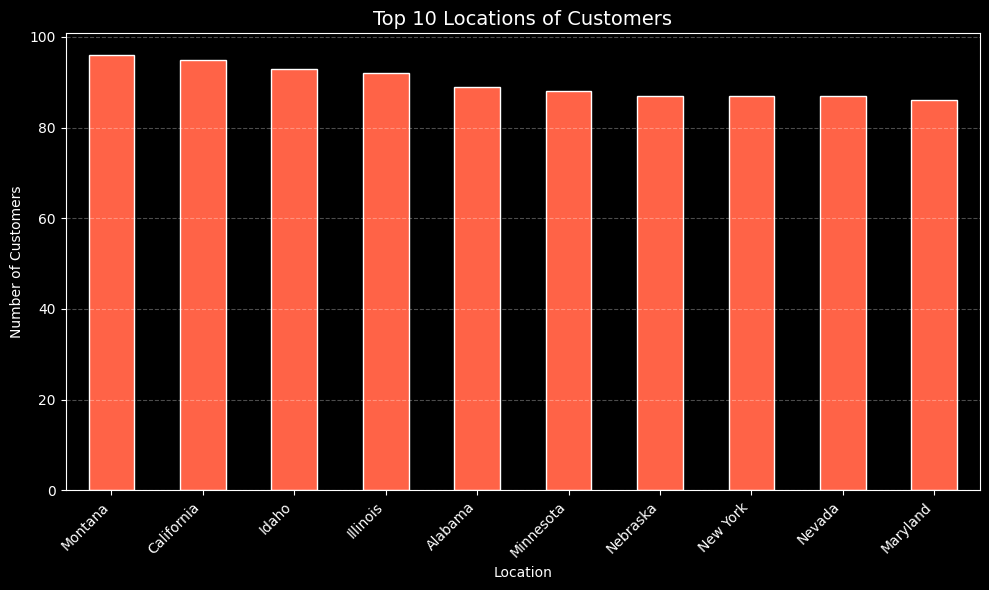

In [12]:
top_10 = df['Location'].value_counts().nlargest(10)

plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color='#ff6347', edgecolor='white')
plt.title('Top 10 Locations of Customers', fontsize=14, color='white')
plt.xlabel('Location', color='white')
plt.ylabel('Number of Customers', color='white')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## **💳Transaction Details**

**1- 🔃Item Purchased**

In [13]:
df['Item Purchased'].value_counts().sum()

3900

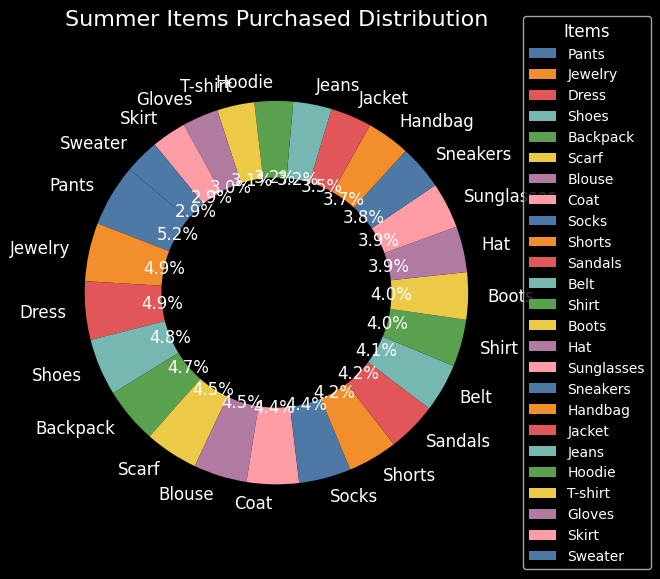

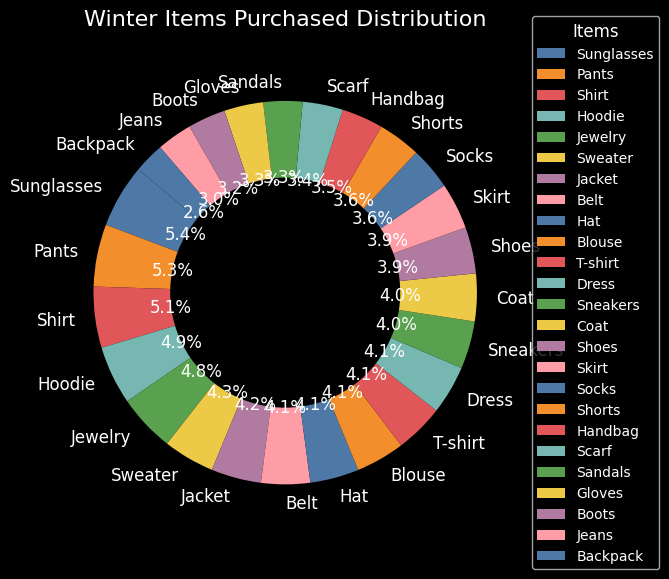

In [14]:
import matplotlib.pyplot as plt

# تقسيم البيانات
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']

# دوال لعمل الرسم
def draw_donut(data, title, colors):
    item_counts = data['Item Purchased'].value_counts()
    labels = item_counts.index
    sizes = item_counts.values

    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(
        sizes,
        labels=labels,
        colors=colors[:len(labels)],
        autopct='%1.1f%%',
        startangle=140,
        textprops=dict(color='white', fontsize=12),
        wedgeprops=dict(width=0.4)
    )

    plt.title(title, fontsize=16, color='white', pad=20)
    plt.gca().set_facecolor('black')
    plt.gcf().patch.set_facecolor('black')
    plt.legend(wedges, labels, title="Items", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10, title_fontsize=12)
    plt.tight_layout()
    plt.show()

# ألوان متناسقة
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', 
          '#59A14F', '#EDC948', '#B07AA1', '#FF9DA7']

# رسم الصيفي والشتوي
draw_donut(summer_df, 'Summer Items Purchased Distribution', colors)
draw_donut(winter_df, 'Winter Items Purchased Distribution', colors)


✅ أكثر سلعة مبيعًا: Blouse


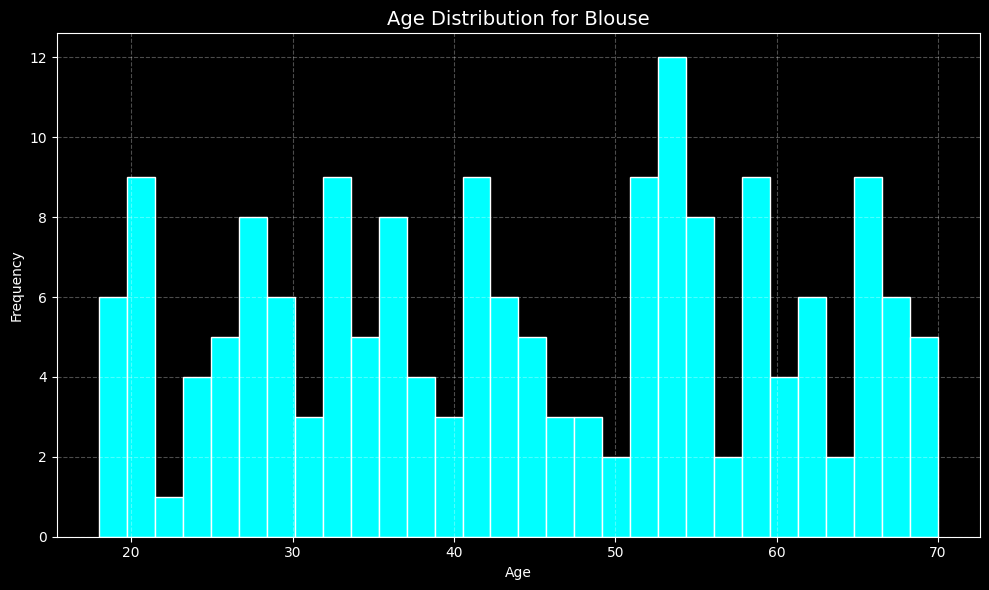

In [15]:
top_item = df['Item Purchased'].value_counts().idxmax()
top_item_df = df[df['Item Purchased'] == top_item]
print(f"✅ أكثر سلعة مبيعًا: {top_item}")

plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.hist(top_item_df['Age'], bins=30, color='cyan', edgecolor='white')
plt.title(f'Age Distribution for {top_item}', fontsize=14, color='white')
plt.xlabel('Age', color='white')
plt.ylabel('Frequency', color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


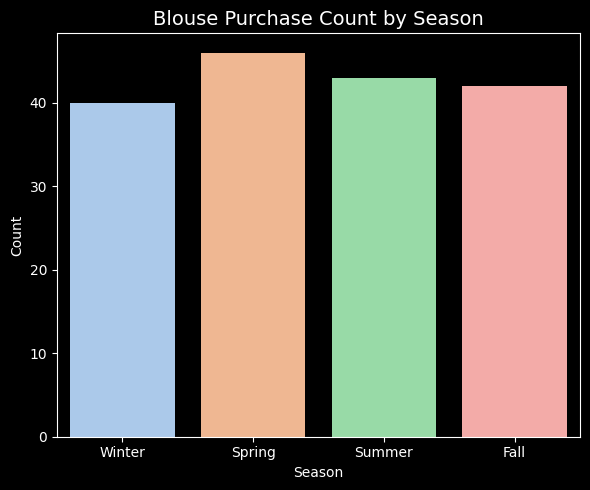

In [16]:
plt.figure(figsize=(6, 5))
sns.countplot(data=top_item_df, x='Season', palette='pastel')
plt.title(f'{top_item} Purchase Count by Season', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**2- Category**

In [17]:
df['Category'].value_counts().sum()

3900

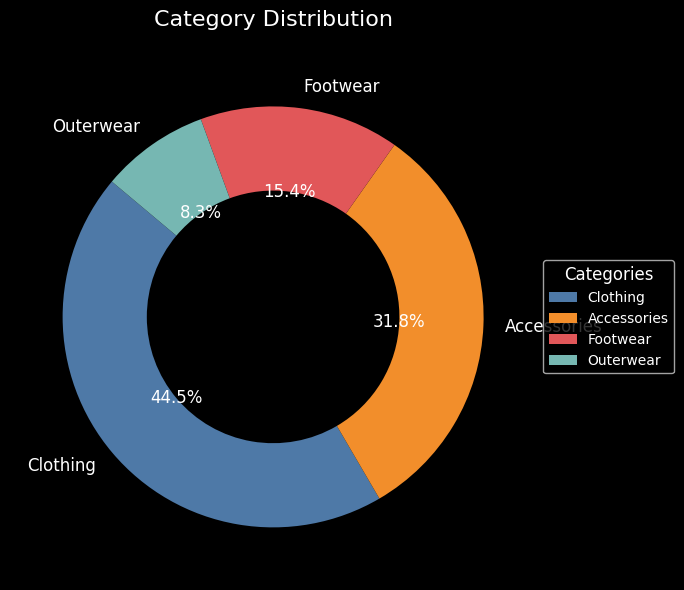

In [18]:

# إعداد البيانات
category_counts = df['Category'].value_counts()
labels = category_counts.index
sizes = category_counts.values

# ألوان احترافية متناسقة
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', 
          '#59A14F', '#EDC948', '#B07AA1', '#FF9DA7']

# إعداد الشكل
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors[:len(labels)],
    autopct='%1.1f%%',
    startangle=140,
    textprops=dict(color='white', fontsize=12),
    wedgeprops=dict(width=0.4)  # Donut effect
)

# عنوان
plt.title('Category Distribution', fontsize=16, color='white', pad=20)

# الخلفية الداكنة
plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')

# تصحيح اسم الدالة: legend وليس leged
plt.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10, title_fontsize=12)

# ترتيب الشكل النهائي
plt.tight_layout()
plt.show()


In [19]:
accessories_df = df[df['Category'] == 'Accessories']

top_item = accessories_df['Item Purchased'].value_counts().idxmax()

print(f"✅ أكثر سلعة مبيعًا في Accessories: {top_item}")

top_item_df = accessories_df[accessories_df['Item Purchased'] == top_item]



✅ أكثر سلعة مبيعًا في Accessories: Jewelry


**3-Purchase Amount (USD): 💲**

In [20]:
print("📊  Purchase Amount (USD):")
print(df['Purchase Amount (USD)'].describe())


📊  Purchase Amount (USD):
count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64


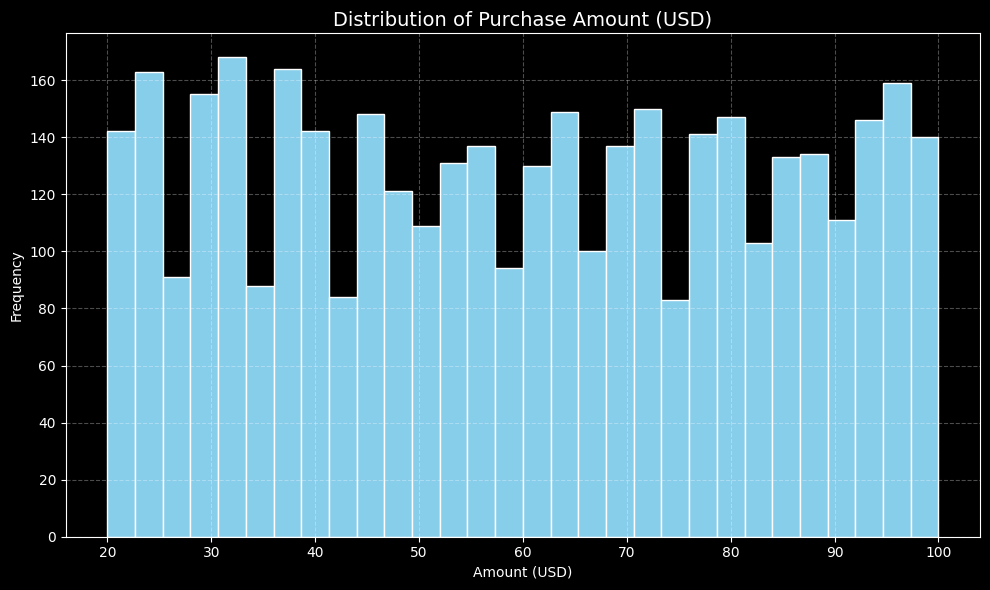

In [21]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.hist(df['Purchase Amount (USD)'], bins=30, color='skyblue', edgecolor='white')
plt.title('Distribution of Purchase Amount (USD)', fontsize=14, color='white')
plt.xlabel('Amount (USD)', color='white')
plt.ylabel('Frequency', color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


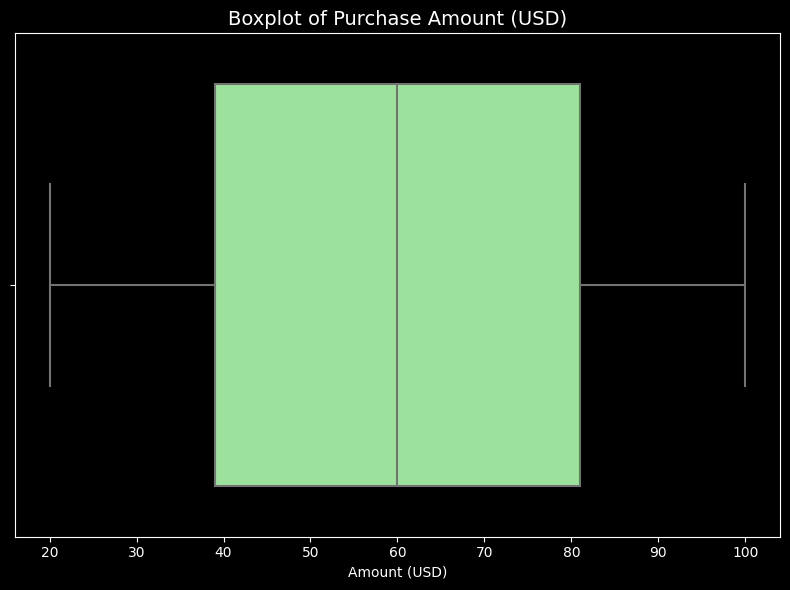

In [22]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Purchase Amount (USD)'], color='lightgreen')
plt.title('Boxplot of Purchase Amount (USD)', fontsize=14)
plt.xlabel('Amount (USD)')
plt.tight_layout()
plt.show()


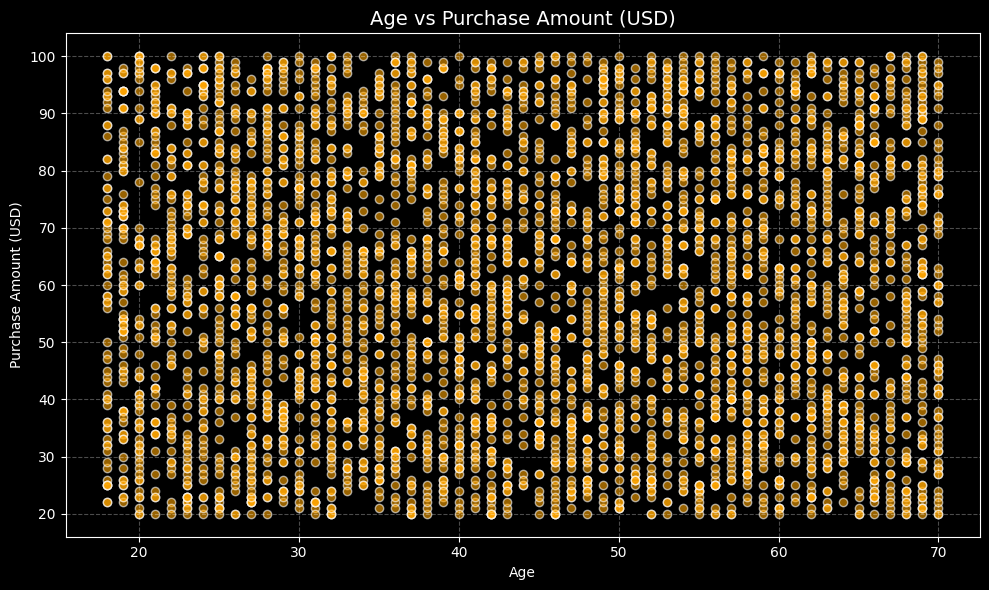

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Purchase Amount (USD)'], color='orange', alpha=0.6, edgecolor='white')
plt.title('Age vs Purchase Amount (USD)', fontsize=14, color='white')
plt.xlabel('Age', color='white')
plt.ylabel('Purchase Amount (USD)', color='white')
plt.gca().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:
avg_per_category = df.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
print("📈 متوسط الشراء لكل فئة:")
print(avg_per_category)


📈 متوسط الشراء لكل فئة:
Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


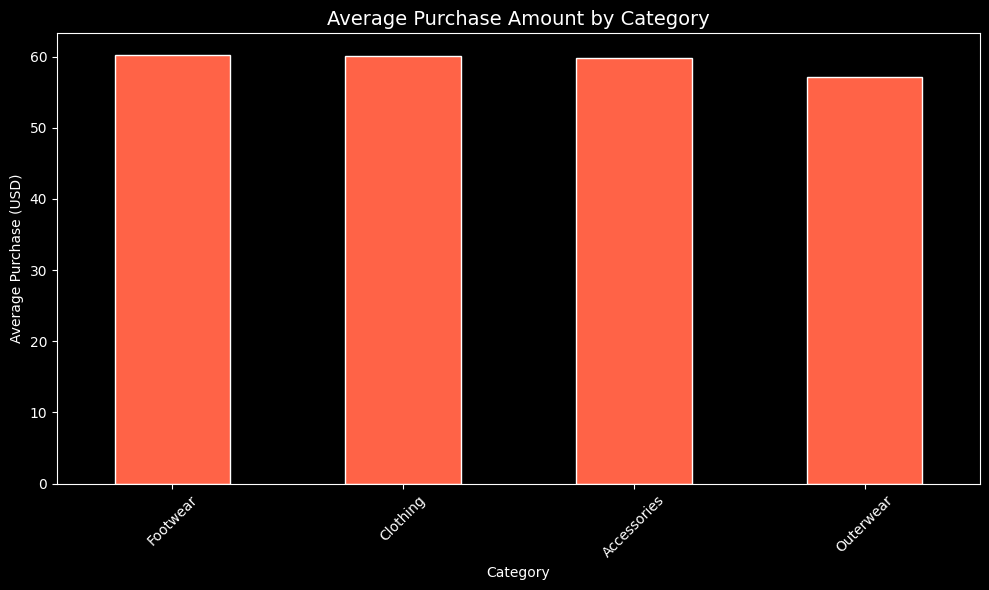

In [25]:
avg_per_category.plot(kind='bar', figsize=(10,6), color='tomato', edgecolor='white')
plt.title('Average Purchase Amount by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Average Purchase (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


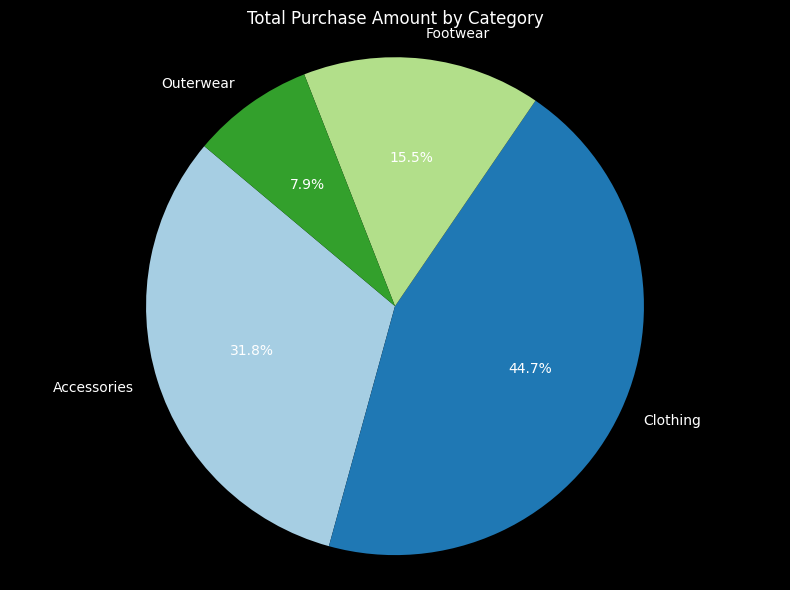

In [26]:
category_sums = df.groupby('Category')['Purchase Amount (USD)'].sum()
plt.figure(figsize=(8, 6))
plt.pie(category_sums.values, labels=category_sums.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Total Purchase Amount by Category')
plt.axis('equal')
plt.tight_layout()
plt.show()


## **Purchase Amount by Gender**

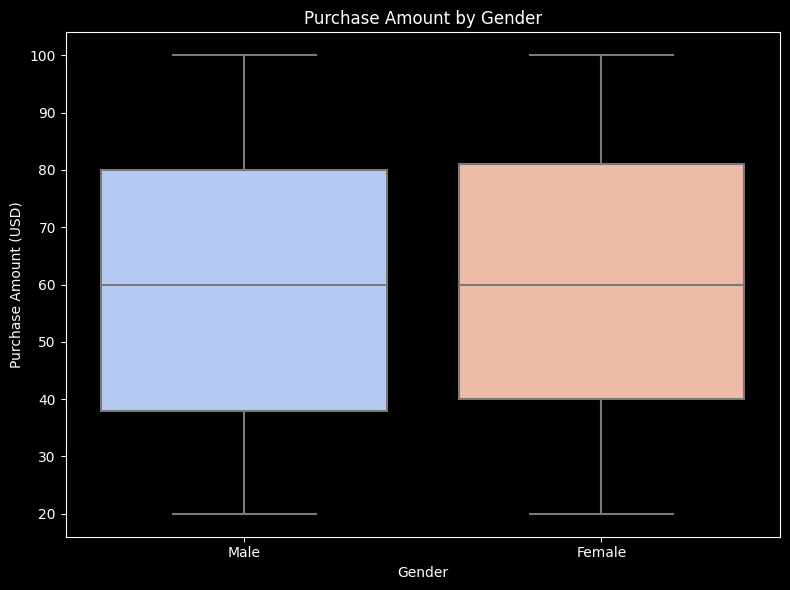

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='coolwarm')
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.tight_layout()
plt.show()


**Purchase Amount by Top 10 Locations📍**

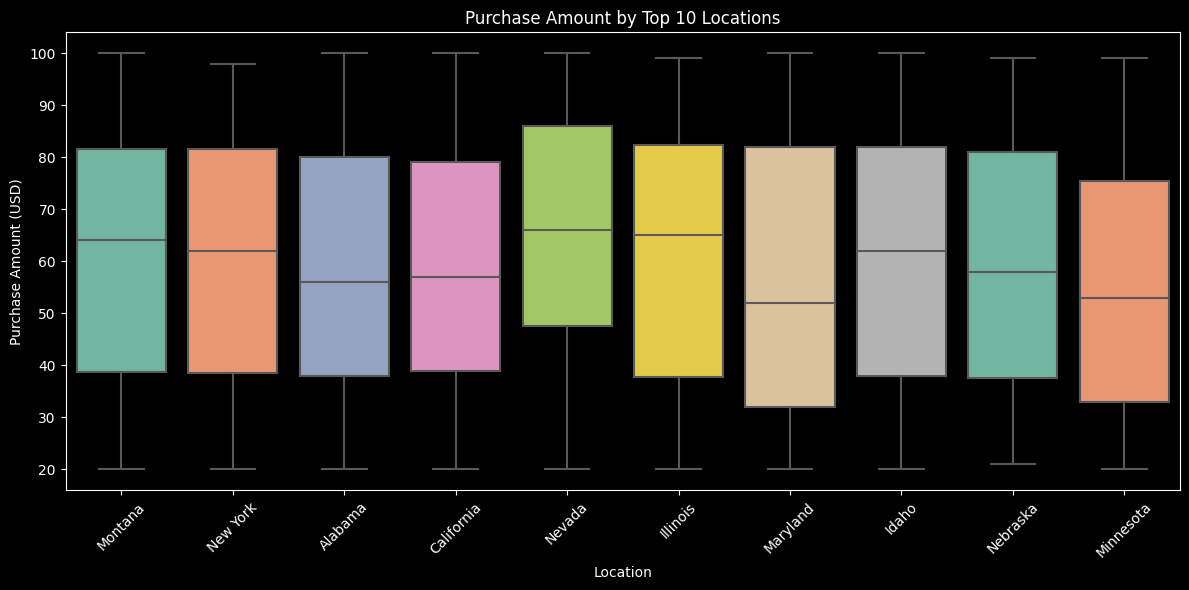

In [28]:
top_locations = df['Location'].value_counts().head(10).index
filtered_df = df[df['Location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Purchase Amount (USD)', data=filtered_df, palette='Set2')
plt.title('Purchase Amount by Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Outliers Detection**

In [29]:
high_purchases = df[df['Purchase Amount (USD)'] > df['Purchase Amount (USD)'].quantile(0.95)]
print("📌 Top 5 High Purchase Amounts:")
print(high_purchases[['Customer ID', 'Purchase Amount (USD)', 'Category']].head())


📌 Top 5 High Purchase Amounts:
     Customer ID  Purchase Amount (USD)     Category
8              9                     97    Outerwear
42            43                    100    Outerwear
91            92                     99  Accessories
95            96                    100     Footwear
100          101                     98  Accessories


/tmp/ipykernel_13/3843697398.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Purchase Amount (USD)'], shade=True, color='orange')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


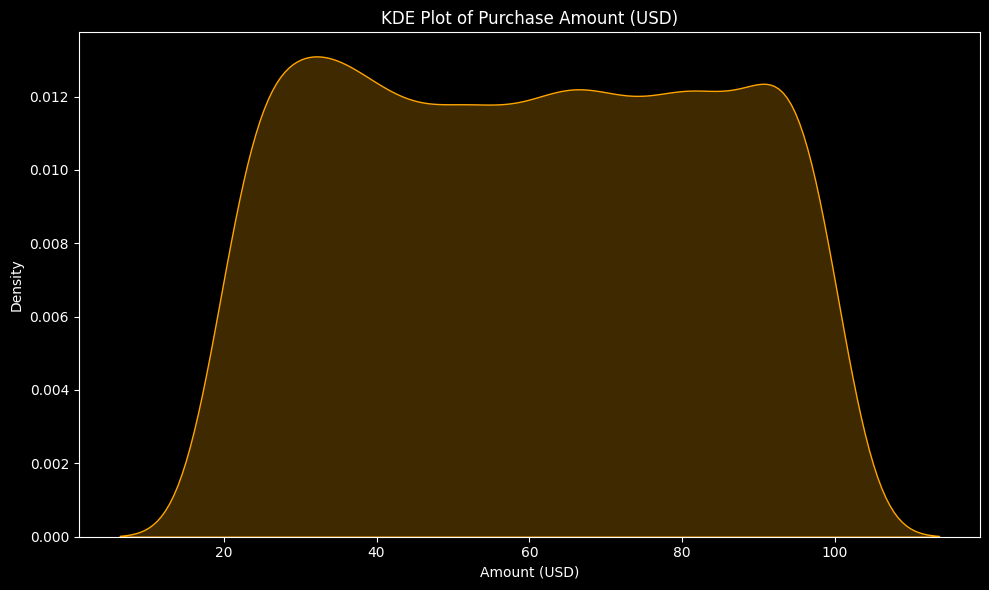

In [30]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Purchase Amount (USD)'], shade=True, color='orange')
plt.title('KDE Plot of Purchase Amount (USD)')
plt.xlabel('Amount (USD)')
plt.tight_layout()
plt.show()


**Payment Method:💰**

### 📊 Distribution of Preferred Payment Method &Payment Method

In [31]:
print("📊 Distribution of Payment Method:")
print(df['Payment Method'].value_counts(normalize=True) * 100)

print("\n📊 Distribution of Preferred Payment Method:")
print(df['Preferred Payment Method'].value_counts(normalize=True) * 100)


📊 Distribution of Payment Method:
Payment Method
Credit Card      17.846154
Venmo            16.743590
Cash             16.615385
PayPal           16.358974
Debit Card       16.230769
Bank Transfer    16.205128
Name: proportion, dtype: float64

📊 Distribution of Preferred Payment Method:
Preferred Payment Method
PayPal           17.358974
Credit Card      17.205128
Cash             17.179487
Debit Card       16.307692
Venmo            16.256410
Bank Transfer    15.692308
Name: proportion, dtype: float64


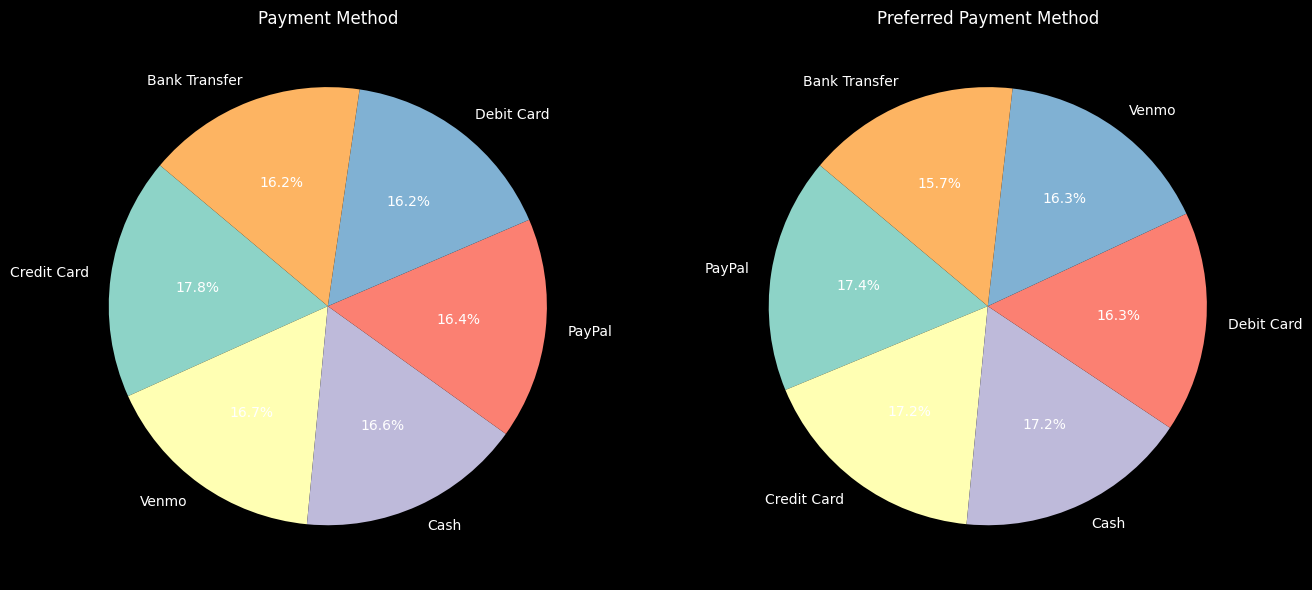

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
colors = plt.cm.Set3.colors

# Pie 1 - Payment Method
df['Payment Method'].value_counts().plot.pie(
    ax=axes[0],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    title='Payment Method'
)

# Pie 2 - Preferred Payment Method
df['Preferred Payment Method'].value_counts().plot.pie(
    ax=axes[1],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    title='Preferred Payment Method'
)

for ax in axes:
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


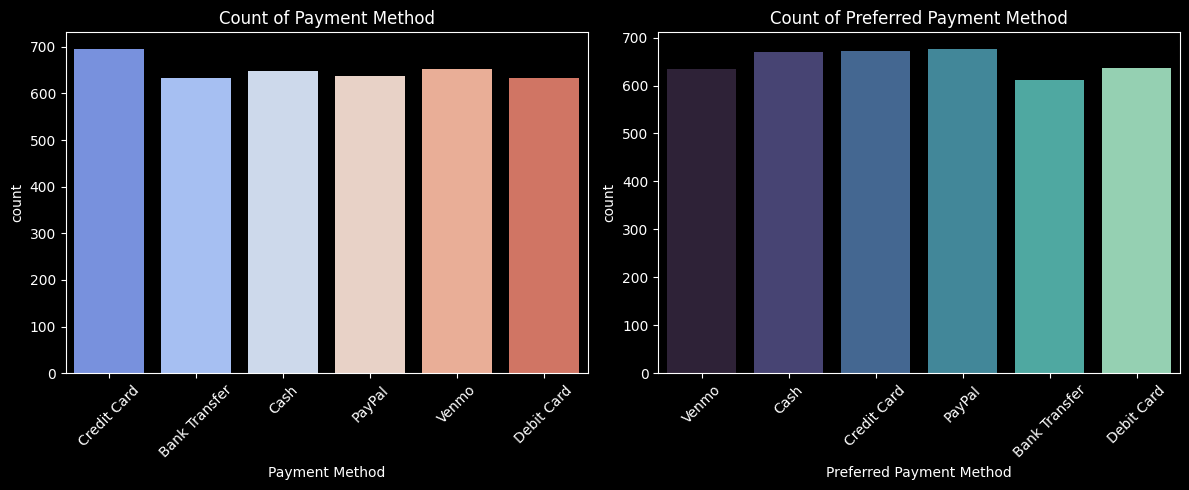

In [33]:
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Payment Method', palette='coolwarm')
plt.title('Count of Payment Method')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Preferred Payment Method', palette='mako')
plt.title('Count of Preferred Payment Method')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Match vs Mismatch

In [34]:
df['Payment Match'] = df['Payment Method'] == df['Preferred Payment Method']
match_rate = df['Payment Match'].value_counts(normalize=True) * 100

print(f"✅ نسبة المطابقة بين الدفع الفعلي والمفضل: {match_rate.get(True, 0):.2f}%")
print(f"❌ نسبة الاختلاف: {match_rate.get(False, 0):.2f}%")


✅ نسبة المطابقة بين الدفع الفعلي والمفضل: 15.82%
❌ نسبة الاختلاف: 84.18%


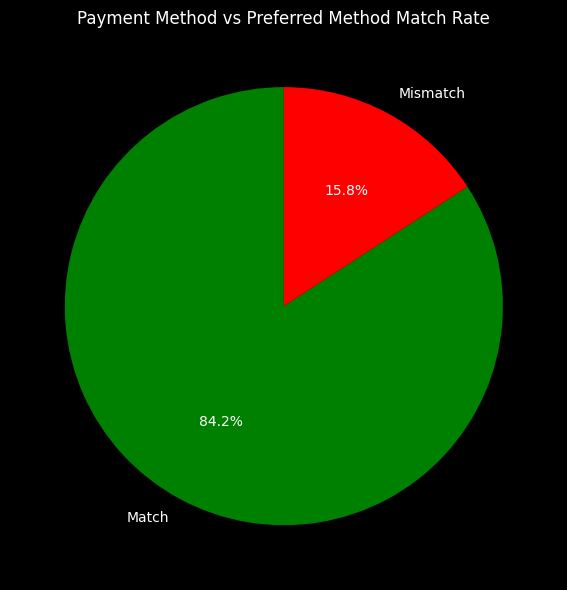

In [35]:
plt.figure(figsize=(6, 6))
match_labels = ['Match', 'Mismatch']
match_counts = df['Payment Match'].value_counts()
plt.pie(match_counts, labels=match_labels, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Payment Method vs Preferred Method Match Rate')
plt.tight_layout()
plt.show()


**Top 10 Most Common Actual vs Preferred Payment Combinations**

In [36]:
combo = df.groupby(['Payment Method', 'Preferred Payment Method']).size().sort_values(ascending=False).head(10)
print("🔥 Top 10 Most Common Actual vs Preferred Payment Combinations:")
print(combo)


🔥 Top 10 Most Common Actual vs Preferred Payment Combinations:
Payment Method  Preferred Payment Method
Credit Card     PayPal                      126
                Debit Card                  124
Bank Transfer   Credit Card                 123
Venmo           Credit Card                 122
Credit Card     Cash                        122
Cash            Cash                        120
Credit Card     Bank Transfer               119
Debit Card      Credit Card                 118
Venmo           PayPal                      118
Cash            PayPal                      116
dtype: int64


## **Behavioral Insights**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


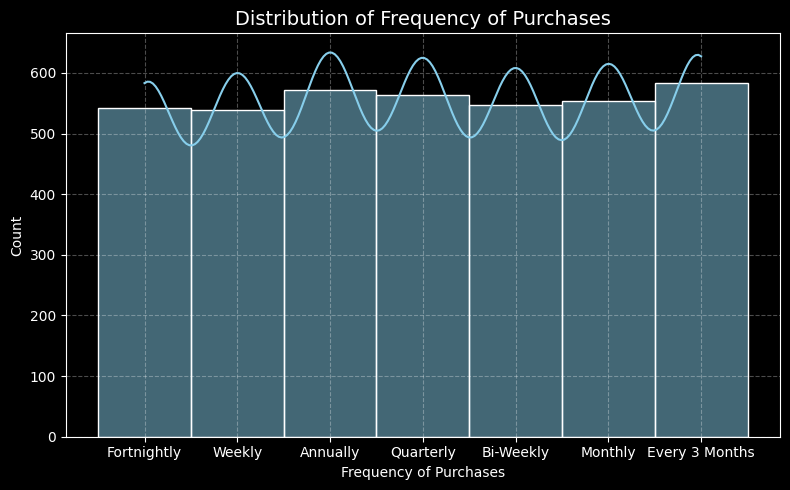

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


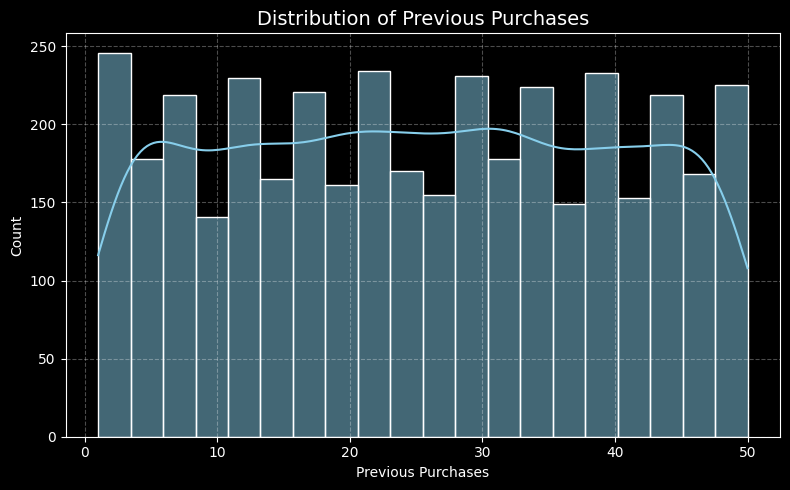

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


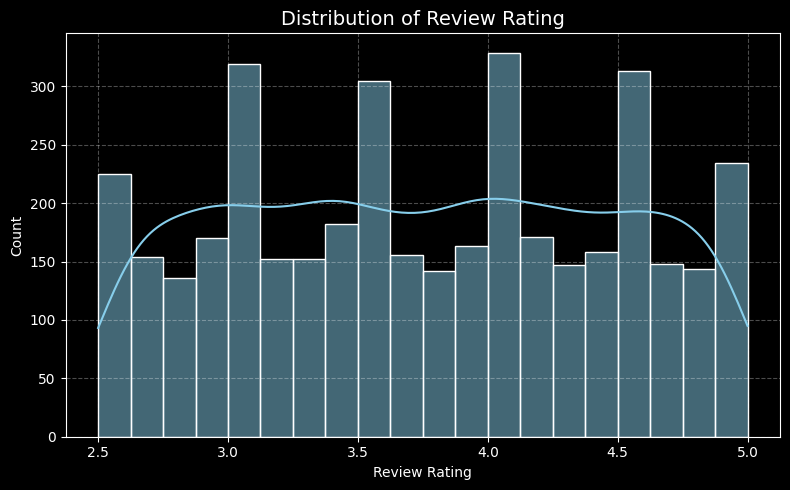

In [37]:

cols = ['Frequency of Purchases', 'Previous Purchases', 'Review Rating']

for col in cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()



**Relationship between Purchase Frequency and Review Rating**

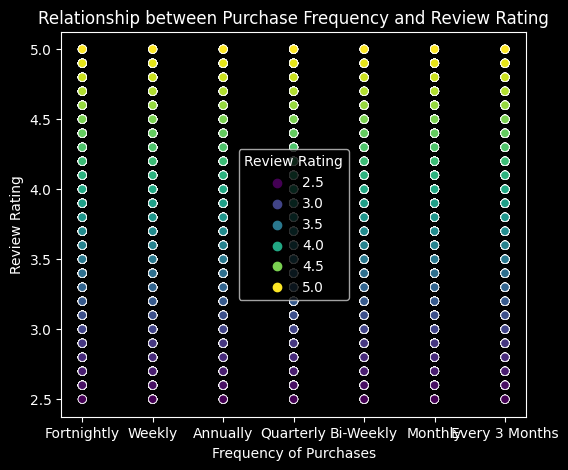

In [38]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Frequency of Purchases', y='Review Rating', hue='Review Rating', palette='viridis')
plt.title('Relationship between Purchase Frequency and Review Rating')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Review Rating')
plt.show()


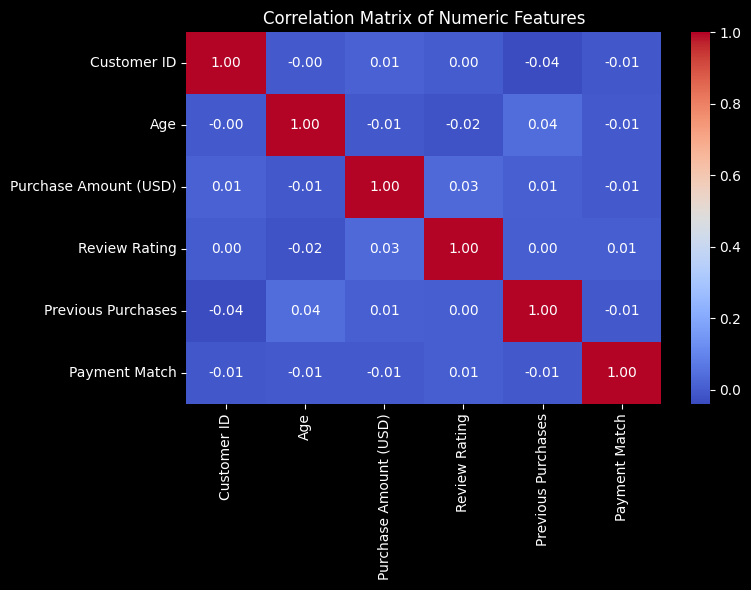

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


### Calculate revenue by category🔥👌🏻

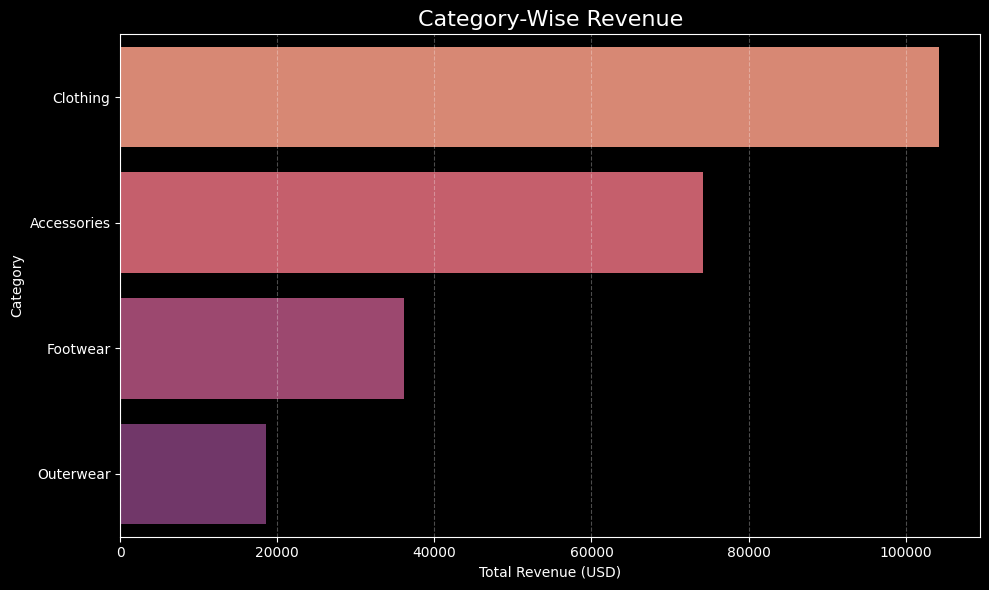

In [40]:
category_revenue = df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
category_revenue = category_revenue.sort_values(by='Purchase Amount (USD)', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=category_revenue,
    x='Purchase Amount (USD)',
    y='Category',
    palette='flare'
)
plt.title('Category-Wise Revenue', fontsize=16, color='white')
plt.xlabel('Total Revenue (USD)', color='white')
plt.ylabel('Category', color='white')
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()


### Histogram for review ratings


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


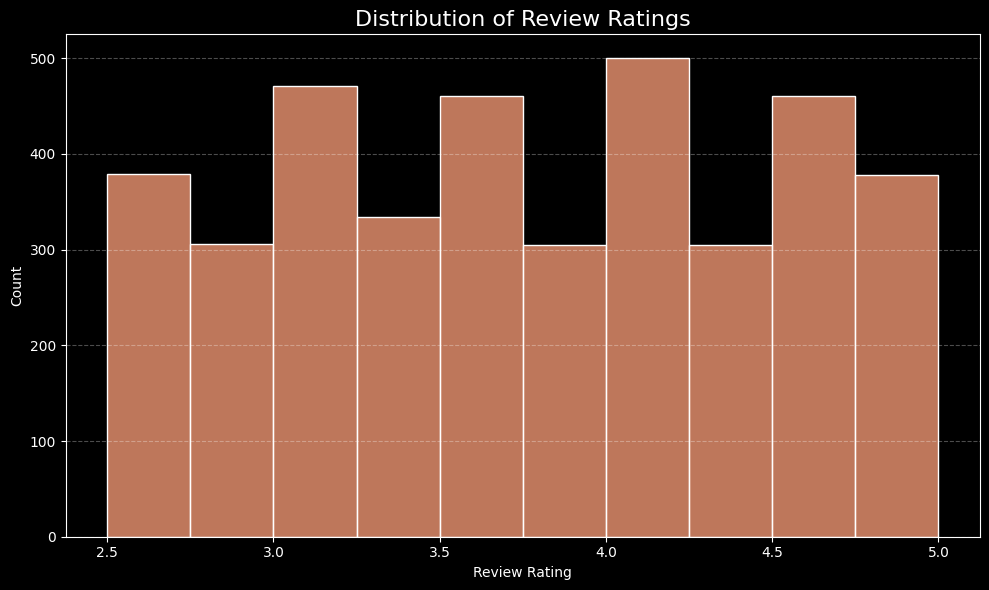

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='Review Rating',
    bins=10,
    kde=False,
    color='#FFA07A'  
)

plt.title('Distribution of Review Ratings', fontsize=16, color='white')
plt.xlabel('Review Rating', color='white')
plt.ylabel('Count', color='white')
plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


### Group data by shipping type and calculate total revenue

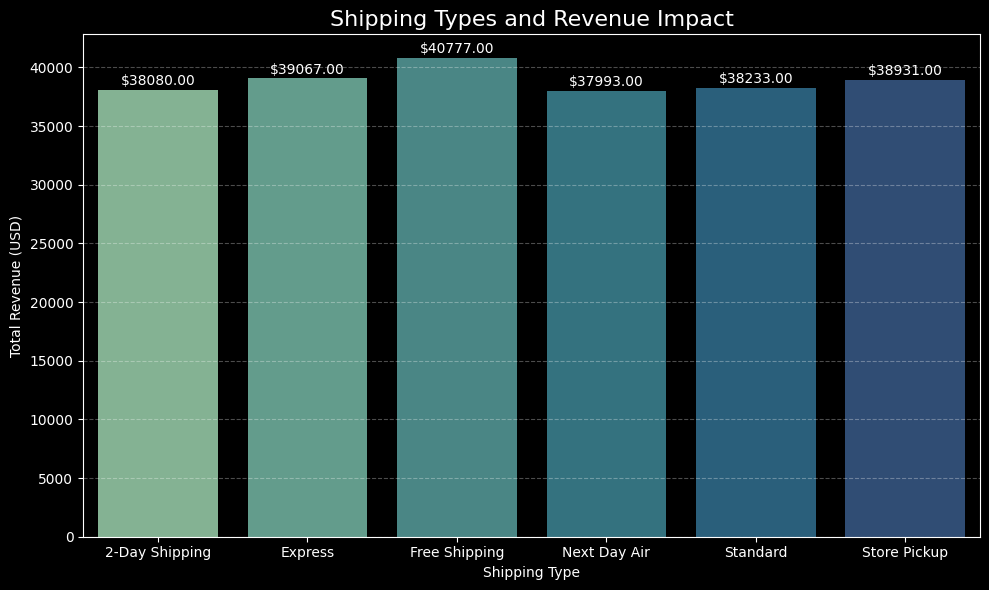

In [42]:
shipping_data = df.groupby('Shipping Type')['Purchase Amount (USD)'].sum().reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=shipping_data,
    x='Shipping Type',
    y='Purchase Amount (USD)',
    palette='crest'  
)

for i, row in shipping_data.iterrows():
    plt.text(i, row['Purchase Amount (USD)'] + shipping_data['Purchase Amount (USD)'].max() * 0.01,
             f"${row['Purchase Amount (USD)']:.2f}", 
             color='white', ha='center', fontsize=10)

# تنسيقات احترافية
plt.title('Shipping Types and Revenue Impact', fontsize=16, color='white')
plt.xlabel('Shipping Type', color='white')
plt.ylabel('Total Revenue (USD)', color='white')
plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


## **Promotional**

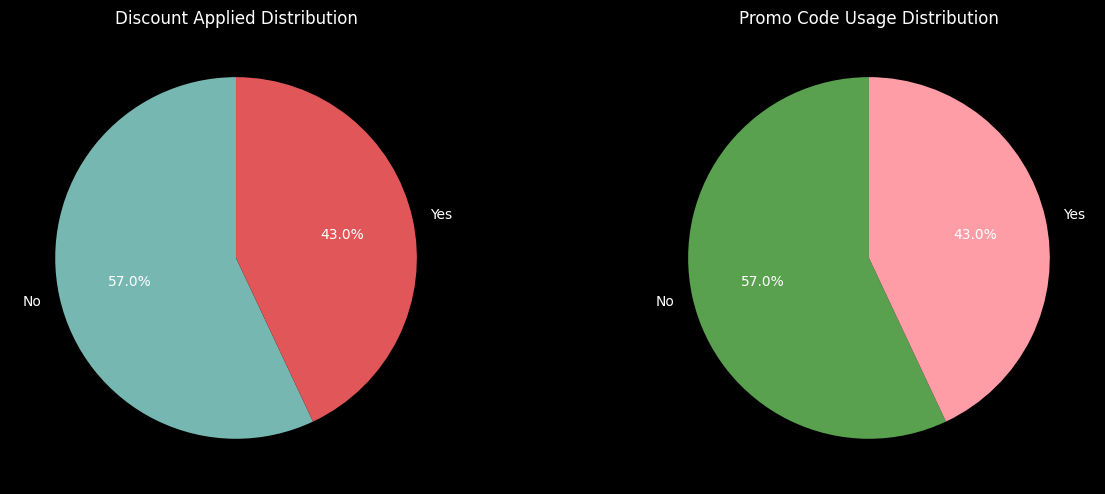

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.subplots_adjust(wspace=0.4)


df['Discount Applied'] = df['Discount Applied'].astype(str)
discount_counts = df['Discount Applied'].value_counts()
axes[0].pie(discount_counts, labels=discount_counts.index, autopct='%1.1f%%', colors=['#76B7B2', '#E15759'], startangle=90)
axes[0].set_title('Discount Applied Distribution')

df['Promo Code Used'] = df['Promo Code Used'].astype(str)
promo_counts = df['Promo Code Used'].value_counts()
axes[1].pie(promo_counts, labels=promo_counts.index, autopct='%1.1f%%', colors=['#59A14F', '#FF9DA7'], startangle=90)
axes[1].set_title('Promo Code Usage Distribution')

plt.show()


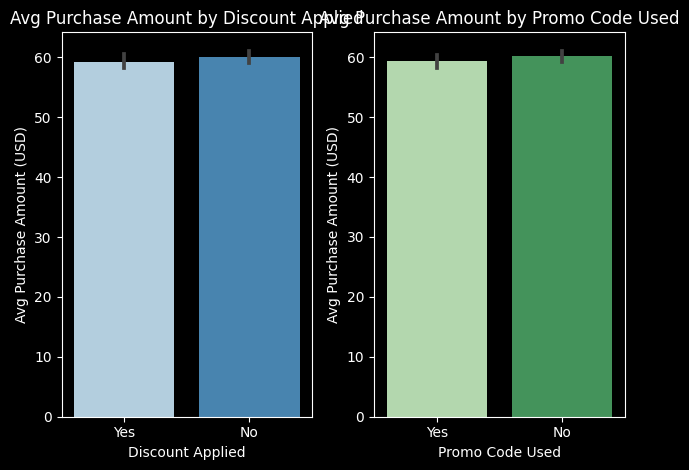

In [44]:

# متوسط المبلغ عند استخدام الخصم
plt.subplot(1,2,1)
sns.barplot(data=df, x='Discount Applied', y='Purchase Amount (USD)', palette='Blues')
plt.title('Avg Purchase Amount by Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Avg Purchase Amount (USD)')

# متوسط المبلغ عند استخدام كود
plt.subplot(1,2,2)
sns.barplot(data=df, x='Promo Code Used', y='Purchase Amount (USD)', palette='Greens')
plt.title('Avg Purchase Amount by Promo Code Used')
plt.xlabel('Promo Code Used')
plt.ylabel('Avg Purchase Amount (USD)')

plt.tight_layout()
plt.show()


**Promo Code vs Discount Usage**

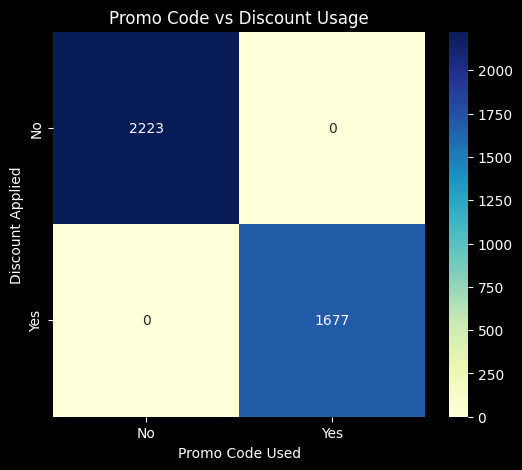

In [45]:
cross_df = pd.crosstab(df['Discount Applied'], df['Promo Code Used'])

plt.figure(figsize=(6,5))
sns.heatmap(cross_df, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Promo Code vs Discount Usage')
plt.xlabel('Promo Code Used')
plt.ylabel('Discount Applied')
plt.show()


## 👥 Customer Segmentation

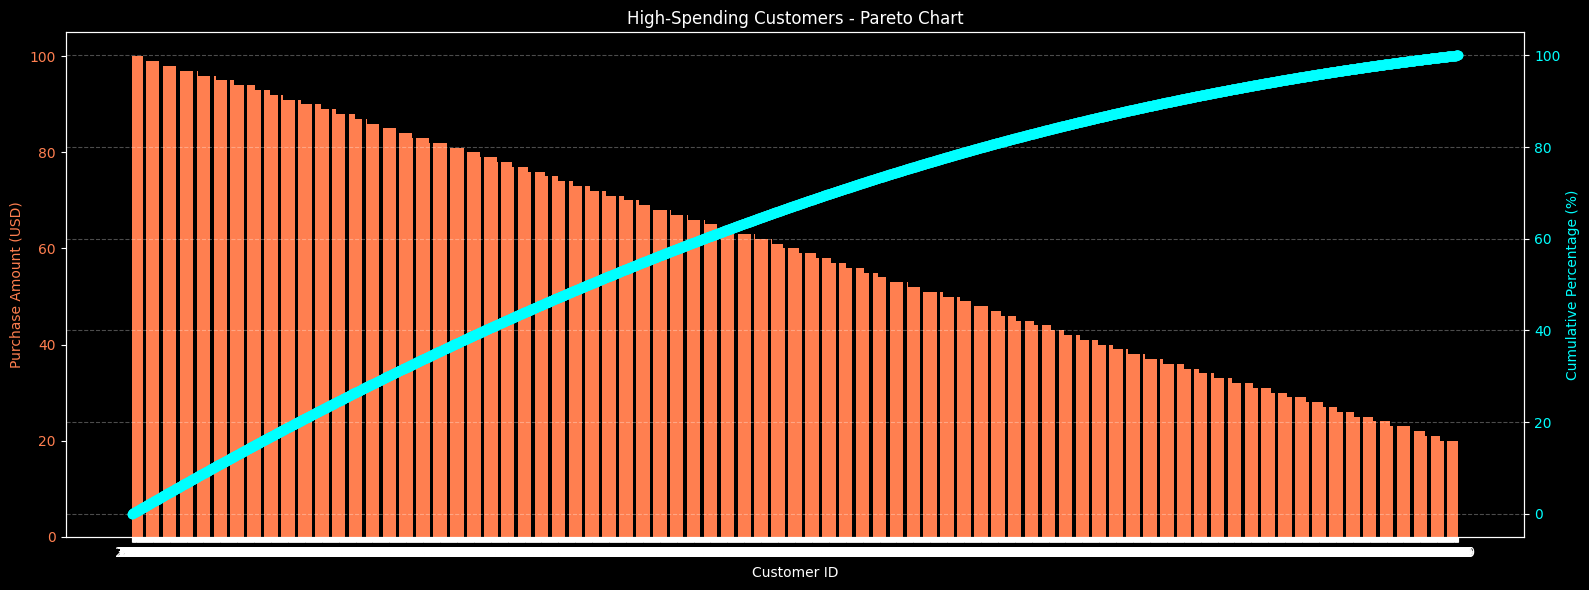

In [46]:
# حساب إجمالي الشراء لكل عميل
customer_revenue = df.groupby('Customer ID')['Purchase Amount (USD)'].sum().reset_index()
customer_revenue = customer_revenue.sort_values(by='Purchase Amount (USD)', ascending=False)

# حساب النسبة التراكمية
customer_revenue['Cumulative Percentage'] = customer_revenue['Purchase Amount (USD)'].cumsum() / customer_revenue['Purchase Amount (USD)'].sum() * 100

# الرسم
fig, ax1 = plt.subplots(figsize=(16, 6))

# العمود (Purchase Amount)
color_bar = '#FF7F50'
ax1.bar(customer_revenue['Customer ID'].astype(str), customer_revenue['Purchase Amount (USD)'], color=color_bar)
ax1.set_xlabel('Customer ID')
ax1.set_ylabel('Purchase Amount (USD)', color=color_bar)
ax1.tick_params(axis='y', labelcolor=color_bar)
ax1.set_title('High-Spending Customers - Pareto Chart')

# منحنى النسبة التراكمية (Cumulative %)
ax2 = ax1.twinx()
color_line = 'cyan'
ax2.plot(customer_revenue['Customer ID'].astype(str), customer_revenue['Cumulative Percentage'], color=color_line, marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', color=color_line)
ax2.tick_params(axis='y', labelcolor=color_line)

# تحسين العرض
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [47]:
import plotly.graph_objects as go

# حساب إجمالي الشراء لكل عميل
customer_revenue = df.groupby('Customer ID')['Purchase Amount (USD)'].sum().reset_index()
customer_revenue = customer_revenue.sort_values(by='Purchase Amount (USD)', ascending=False)

# حساب النسبة التراكمية
customer_revenue['Cumulative Percentage'] = customer_revenue['Purchase Amount (USD)'].cumsum() / customer_revenue['Purchase Amount (USD)'].sum() * 100

# الرسم باستخدام Plotly
fig = go.Figure()

# الرسم العمودي (bars)
fig.add_trace(go.Bar(
    x=customer_revenue['Customer ID'].astype(str),
    y=customer_revenue['Purchase Amount (USD)'],
    name='Purchase Amount',
    marker_color='#FF7F50',
    yaxis='y1'
))

# الخط التراكمي (line)
fig.add_trace(go.Scatter(
    x=customer_revenue['Customer ID'].astype(str),
    y=customer_revenue['Cumulative Percentage'],
    name='Cumulative %',
    yaxis='y2',
    mode='lines+markers',
    marker=dict(color='cyan'),
    line=dict(width=2)
))

# ضبط الشكل والتنسيقات
fig.update_layout(
    title='High-Spending Customers - Pareto Chart',
    xaxis=dict(title='Customer ID'),
    yaxis=dict(
        title='Purchase Amount (USD)',
        titlefont=dict(color='#FF7F50'),
        tickfont=dict(color='#FF7F50')
    ),
    yaxis2=dict(
        title='Cumulative Percentage (%)',
        titlefont=dict(color='cyan'),
        tickfont=dict(color='cyan'),
        overlaying='y',
        side='right',
        range=[0, 110]
    ),
    legend=dict(x=0.01, y=0.99),
    template="plotly_dark"
)

fig.show()


## **Data Modeling✅**

In [48]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Payment Match
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,False
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,False
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,False
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,True
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,False


### 🧠 Idea:
**We treat Payment Match as target (a value you want to predict), which is a Boolean value (True/False), i.e. Binary Classification**

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Encoding categorical variables for this data

from sklearn.preprocessing import LabelEncoder
x=df.drop(columns=['Payment Match'])
y=df['Payment Match']
categorical_cols = x.select_dtypes(include=['object', 'category']).columns

encoder = LabelEncoder()
for col in categorical_cols:
    x[col] = encoder.fit_transform(x[col])

In [50]:
x.drop(columns=['Customer ID'], inplace=True)
x.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,1,2,1,53,16,0,7,3,3.1,1,2,1,1,1,14,5,3
1,19,1,23,1,64,18,0,12,3,3.1,1,0,1,1,1,2,1,3
2,50,1,11,1,73,20,2,12,1,3.1,1,1,2,1,1,23,2,6
3,21,1,14,2,90,38,1,12,1,3.5,1,4,3,1,1,49,4,6
4,45,1,2,1,49,36,1,21,1,2.7,1,1,2,1,1,31,4,0


**Divide the data into train and test**

In [51]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\Training set: {x_train.shape}")
print(f"Validation set: {x_test.shape}")

\Training set: (3120, 18)
Validation set: (780, 18)


### RandomForestClassifier🌲

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

if accuracy >= 0.75:
    print("Target accuracy of 75% achieved!")
else:
    print("Target accuracy not achieved. Consider tuning hyperparameters or trying other models.")

Model Accuracy: 0.8423
Target accuracy of 75% achieved!


### LogisticRegression🗝

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(x_train, y_train)

# Predict on test set
log_y_pred = log_model.predict(x_test)

# Calculate accuracy
log_accuracy = accuracy_score(y_test, log_y_pred)
print(f"Logistic Regression Model Accuracy: {log_accuracy:.4f}")

if log_accuracy >= 0.85:
    print("Target accuracy of 85% achieved!")
else:
    print("Target accuracy not achieved. Consider tuning hyperparameters or trying other models.")

Logistic Regression Model Accuracy: 0.8423
Target accuracy not achieved. Consider tuning hyperparameters or trying other models.


### GradientBoostingClassifier

**Group of Tree in one model**

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(x_train, y_train)

# Predict on test set
gb_y_pred = gb_model.predict(x_test)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print(f"Gradient Boosting Model Accuracy: {gb_accuracy:.4f}")

if gb_accuracy >= 0.90:
    print("Target accuracy of 90% achieved!")
else:
    print("Target accuracy not achieved. Consider tuning hyperparameters or trying other models.")

Gradient Boosting Model Accuracy: 0.9564
Target accuracy of 90% achieved!


### Train a Support Vector Machine (SVM) model

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train a Support Vector Machine (SVM) model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(x_train, y_train)

# Predict on test set
svm_y_pred = svm_model.predict(x_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Model Accuracy: {svm_accuracy:.4f}")

if svm_accuracy >= 0.95:
    print("Target accuracy of 95% achieved!")
else:
    print("Target accuracy not achieved. Consider tuning hyperparameters or trying other models.")


SVM Model Accuracy: 0.8423
Target accuracy not achieved. Consider tuning hyperparameters or trying other models.


## **Deployment✅**

In [56]:
import joblib


joblib.dump(gb_model, 'payment_match_model.pkl')


['payment_match_model.pkl']